# *A/B-тест для интернет магазина*


# Описание данных

**Данные для первой части.**

Файл /datasets/hypothesis.csv. 
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


**Данные для второй части**
Файл /datasets/orders.csv.
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. Скачать датасет
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 


**Часть 1. Приоритизация гипотез**.(А так же загрузка и подготовка данных к анализу)

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Часть 2. Анализ A/B-теста**

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Задача:
Проанализируйте A/B-тест:**

- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

**Примите решение по результатам теста и объясните его. Варианты решений:**

- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

#  Часть 1

### Загрузка и подготовка данных к анализу.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

#### Предобработка таблицы **hypotesis**

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis.duplicated().sum()

0

In [5]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Данные выглядят корректными,типы данных верны,дубликатов нет.

In [6]:
hypothesis.columns = map(str.lower, hypothesis.columns) #для удобства приведу к нижнему регистру
#hypotesis

#### Предобработка таблицы orders

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Приведем столбец date к типу даты.

In [9]:
orders["date"] = orders["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
#orders.info()

Проверим дубликаты.

In [11]:
orders.duplicated().sum()

0

Данные выглядят корректными,дубликатов не обнаружено,изменен тип данных только в столбце date

In [12]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [13]:
orders.groupby('visitorId').agg({'group':'nunique'}).query('group == 2 ').count()

group    58
dtype: int64

In [14]:
both_groups=orders.groupby('visitorId').agg({'group':'nunique'}).reset_index().query('group == 2')

In [15]:
orders=orders.query('visitorId not in @both_groups')

In [16]:
orders.groupby('visitorId').agg({'group':'nunique'}).query('visitorId in @both_groups').count()

group    0
dtype: int64

In [17]:
orders.groupby('visitorId').agg({'group':'nunique'}).query('visitorId not in @both_groups').count()

group    1031
dtype: int64

#### Предобработка таблицы visits

In [18]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [19]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Поменяем тип столбца date на тип данных даты

In [20]:
visitors["date"] = visitors["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [21]:
#visitors.info()

Проверим дубликаты

In [22]:
visitors.duplicated().sum()

0

Данные выглядят корректными,дубликатов не обнаружено,изменен тип данных только в столбце date

### Приоритизация гипотез

In [23]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [24]:
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(1)
hypothesis['RICE'] = (hypothesis['reach']  *hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
pd.set_option('display.max_colwidth', 200)#сразу расширил столбцы ,чтобы было все видно

In [25]:
display(hypothesis[['ICE', 'hypothesis']].sort_values(by='ICE', ascending=False))

,ICE,hypothesis
8,16.2,"Запустить акцию, дающую скидку на товар в день рождения"
0,13.3,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
7,11.2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
6,8.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
2,7.0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
1,2.0,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,1.3,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
3,1.1,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
4,1.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


In [26]:
hypothesis[['RICE', 'hypothesis', 'reach']].sort_values(by='RICE', ascending=False)

,RICE,hypothesis,reach
7,112.0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10
2,56.0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8
0,40.0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3
6,40.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5
8,16.2,"Запустить акцию, дающую скидку на товар в день рождения",1
3,9.0,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8
1,4.0,"Запустить собственную службу доставки, что сократит срок доставки заказов",2
5,4.0,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3
4,3.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3


**Вывод**:

Видны различия в таблицах.

В ICE лидеры это гипотезы с 8,0,7 с индексами,а в RICE это гипотезы с 7,2,0(Это связано с тем ,что в RICE мы используем парметр reach)

Гипотеза 4 в обоих методах осталась на последнем месте.


#  Часть 2

Посмотрим на количество клиентов в группах A и В ,а так же на число покупок

In [27]:
purchasesA = len(orders[orders['group']=='A'])
purchasesB = len(orders[orders['group']=='B'])

print('Кол-во посетителей в группе А: {}'.format(visitors[visitors['group']=='A']['visitors'].sum()))
print('Кол-во посетителей в группе B: {}'.format(visitors[visitors['group']=='B']['visitors'].sum())) 
print('Кол-во покупок в группе A: {}'.format(purchasesA))
print('Кол-во покупок в группе B: {}'.format(purchasesB))

Кол-во посетителей в группе А: 18736
Кол-во посетителей в группе B: 18916
Кол-во покупок в группе A: 557
Кол-во покупок в группе B: 640


### Постройте график кумулятивной выручки по группам. 

In [28]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Теперь строим график кумулятивной выручки

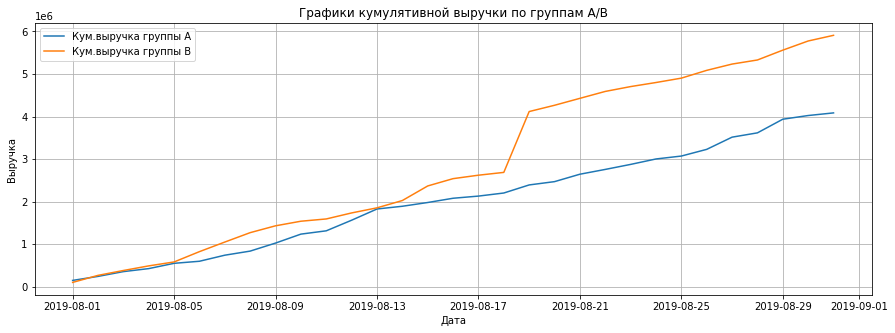

In [29]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

register_matplotlib_converters()

plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Кум.выручка группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Кум.выручка группы B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Графики кумулятивной выручки по группам A/B')
plt.grid()
plt.legend() 
plt.show();

**Вывод:**

Как мы видим из графика, группа В показывает стабильно большую выручку по сравнению с группой А

И в августе 18 числа был резкий скачок у группы В , а группа идет стабильно без резких подьемов или падений(могу предположить,что в августе был заказ на большую сумму).

### Постройте график кумулятивного среднего чека по группам.

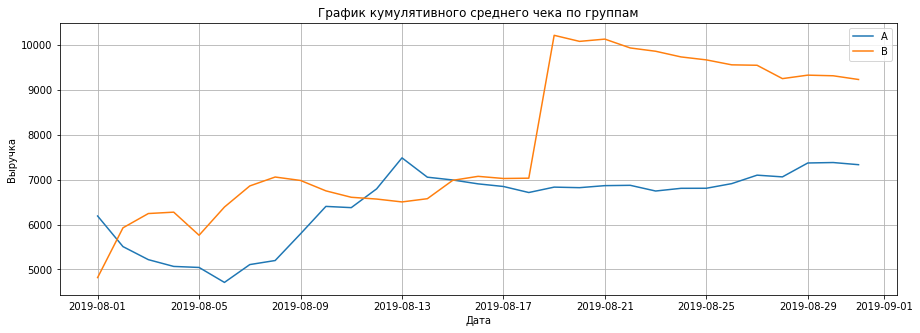

In [30]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.grid()
plt.legend() 

График группы В так-же больше чем группы А,однако есть отрезок времени,где чек группы А больше -это в начале августа и 11-14 августа.

После 14 августа средний чек группы В намного больше,опять же могу сказать ,что был крупный заказ 19 числа.

После крупного заказа 19 числа средний чек группы В постепенно снижается.


Посмотрю на этот крупный заказ 19 числа.

In [31]:
orders.query(' "2019-08-17" <= date <= "2019-08-21" ').sort_values(by='revenue', ascending=False).head(8)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
949,1347999392,887908475,2019-08-21,60450,A
530,3970235543,2912540959,2019-08-19,43990,A
751,348143148,689129267,2019-08-20,37150,B
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
890,1192185169,2853587382,2019-08-21,30649,B
461,2683113224,154576532,2019-08-19,26550,B


Вот и наш крупный заказ под номером 425,как раз из группы В, он заметно выделяется на фоне остальных

Уверен,что из-за него и такие резкие подьемы на графиках группы В

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. 

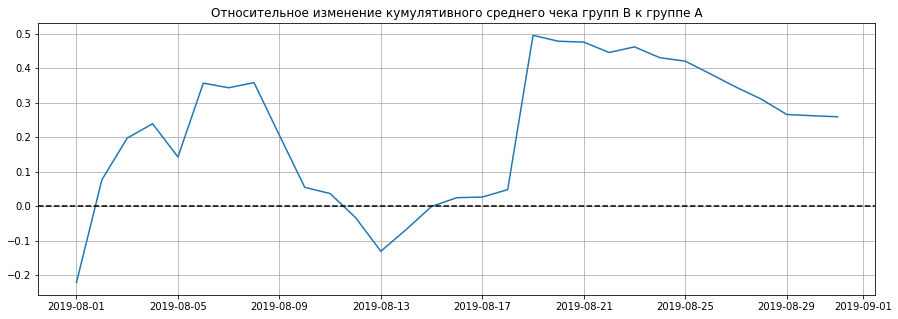

In [32]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека групп B к группе А')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

**Вывод:**

Средний чек группы В рос с 1 августа и 2 августа уже превысил группу А,однако после 4 числа немного снизился и обратно вырос,вплоть до 7-8 числа.

После 7-8 числа средний чек начал снижаться .

С 13 числа он снова возрастает,однако стоит отметить ,что с 12 по 14 число средний чек группы А был больше.

Далее мы видим уже знакомый подьем 19 числа,который обусловлен крупным заказом ( номер 425), далее средний чек постепенно снижается

### Постройте график кумулятивного среднего количества заказов на посетителя по группам.

(18109.0, 18139.0, 0.028, 0.038)

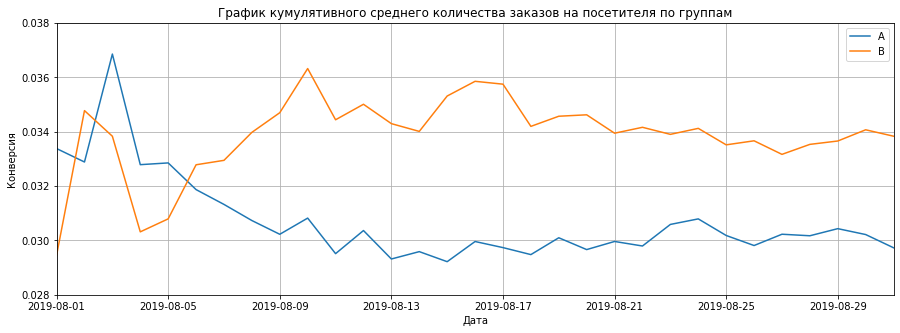

In [33]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.grid()
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0.028, 0.038])  

**Вывод:**

В начале августа группа А была больше группы В(~3 числа максимальный пик) , после пика видим сильное падение.

График группы В с 4 августа начинает расти и 6 августа превысил группу А(стоит отметить ,что 10 августа график достиг своего пика - чуть выше 0.036)

Затем пошло постепенное снижение графика В с резким всплеском 14-17 августа ( очень близко к пиковому значению)

Можно сделать вывод что график группы В значительно больше группы А (начиная с 6 августа)

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

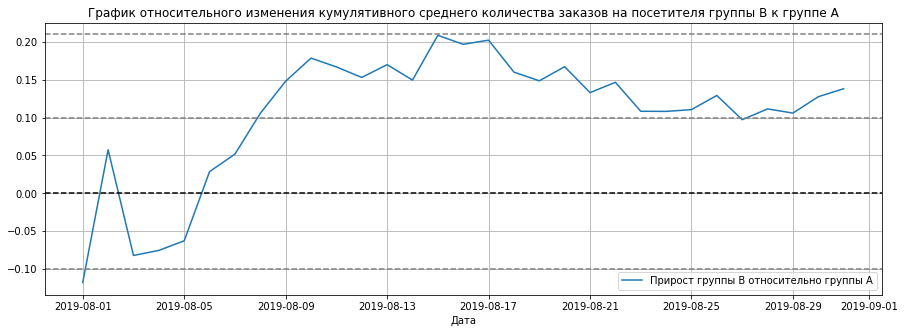

In [34]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Прирост группы B относительно группы A")
plt.legend()
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axhline(y=0.21, color='grey', linestyle='--')


**Вывод:**

С 1 по 5 группа А была была больше на 5-10 процентов,однако стоит отметить ,что 2 августа был резкий прирост группы В.

Начиная с 6 числа группа В лидировала до конца периода.

График группы В рос вплоть до 15 августа(разница с группой А составила примерно 21 процент),после постепенно начал снижаться.

### Постройте точечный график количества заказов по пользователям.

In [35]:
ordersByUsers = orders.groupby('visitorId', as_index = False).agg({'transactionId':'nunique'}).sort_values(by='transactionId', ascending = False)
ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.head(10)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Видим,что есть  пользователи, которые совершали 5, 8, 9, 11, заказов. 

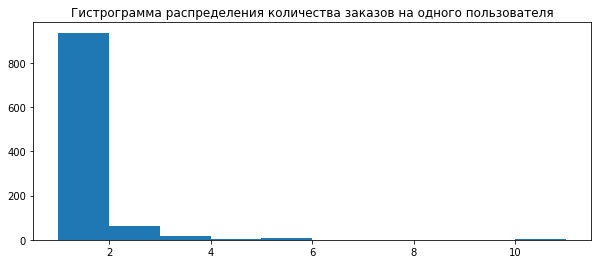

In [36]:
#Построим гистрограмму распределения количества заказов на одного пользователя.
plt.figure(figsize=(10,4))
plt.hist(ordersByUsers['orders'], bins = 10)
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.show()

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-3 заказами тоже значительна.

Построим точечную диаграмму числа заказов по пользователям:

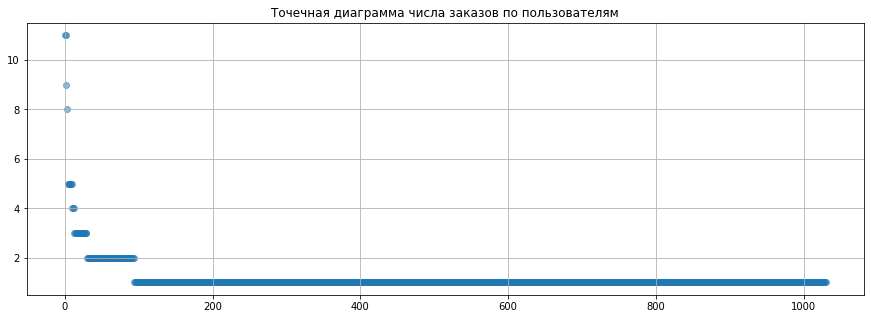

In [37]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.grid()
plt.title('Точечная диаграмма числа заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.5) ;

Судя по граифкам, подавляющее большинство пользователей не совершает более 2 заказов

Тех кто совершил 3 заказа совсем мало, и считать ли это выбросами пока не ясно, - надо посчитать процентили (95 и 99). 

Все что больше трех заказов выглядит ,ак аномалия.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя.

In [38]:
print('95 и 99 перцентили: ',np.percentile(ordersByUsers['orders'], [95, 99]))

95 и 99 перцентили:  [2. 4.]


**Вывод:**

Видим,что большинство клиентов делают 1-2 заказа.
Все,что выше - аномалия

### Постройте точечный график стоимостей заказов. 

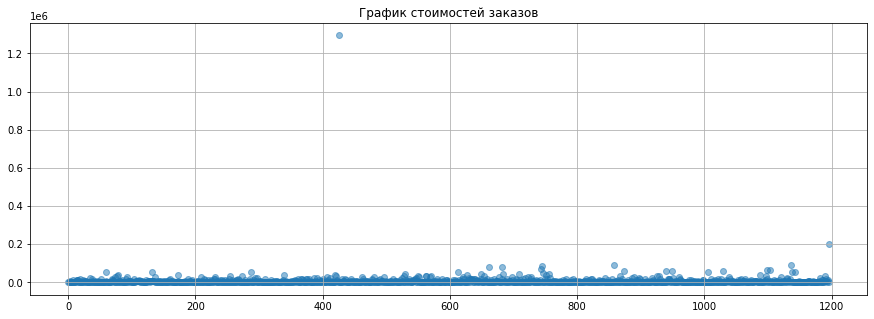

In [39]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(x_values, orders['revenue'], alpha=0.5);

Нужно построить более наглядный график.

Однако сразу можно заметить крупный заказ под номером 425 свыше 1.2 млн

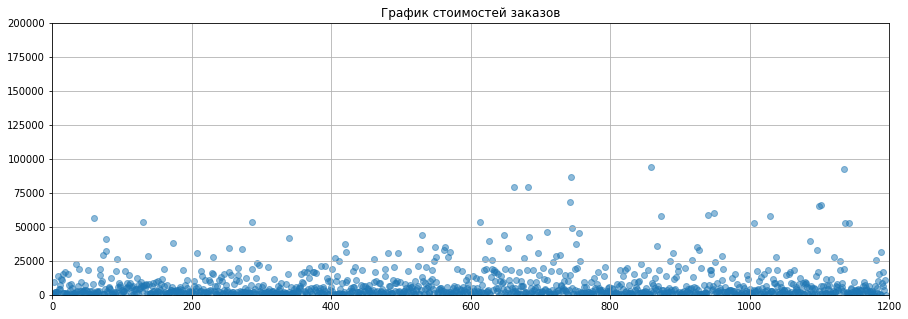

In [40]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.axis([0, 1200, 0, 200000])
plt.show();

Большая часть пользователей делает покупки суммой не больше 25-30 т.р. Нужно посмотреть на перцентили

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [41]:
print('95 и 99 перцентили по стоимости заказов : ', np.percentile(orders['revenue'], [95, 99])) 

95 и 99 перцентили по стоимости заказов :  [28000.  58233.2]


Всего лишь 5 процентов заказов больше 28000

Возьмем за границу значение - 58233.2

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Начнём с подготовки данных

Соберем данные в таблицы и обеденим

выведу 5 строк

In [42]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']


Объеденим данные и выведем первые 5 строк

In [43]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Посчитаем статистическую значимость различия в среднем количестве заказов между группами. Создадим переменные ordersByUsersA и ordersByUsersB 

In [44]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

In [45]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой

Так же сформируем нулевую и альтернативную гипотезы. Нулевая гипотеза говорит о том, что статистическая значимость в количестве заказов и среднемк чеке не значительна и сделать вывод о различии нельзя, альтернативная гипотеза говорит о том, что статистическая значимость в количестве заказов и среднемк чеке значитаельная и между выборками имеется статистическая значимость. Порогом статистической значимости установим alpha=.05

Для расчета р-value, используем непараметрический тест Уилкоксона-Манна-Уитни

In [46]:
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный прирост конверсии групп В и А: {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

alpha = 0.05
p-value = 0.017
Относительный прирост конверсии групп В и А: 0.138


**Вывод:**

P-value значительно меньше 0.05, значит стоит отвергнуть нулевую гипотезу, это значит: по «сырым» данным различия в конверсии групп A и B есть.

Относительный прирост группы В к группе А равен 13.8%.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

За нулевую гипотезу возьмём что: "статистически значимых различий в средних чеках между группами нет', тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.

In [47]:
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print('Относительный прирост конверсии групп В и А: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


alpha = 0.05
p-value = 0.729
Относительный прирост конверсии групп В и А: 0.259


P-value значительно больше 0.05, значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

Относительное различие между чеками около 26%.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 58233.2  — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [48]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [99]))]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
abnormalUsers.head(5)
#orders[orders['revenue'] > 58233.2]['visitorId']

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64

In [49]:
#Всего аномальных пользователей
print(abnormalUsers.shape[0])

31


Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [50]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [51]:
sampleAFiltered.value_counts() , sampleBFiltered.value_counts()

(0    18233
 1      461
 2       17
 Name: orders, dtype: int64,
 0    18330
 1      543
 2       22
 Name: orders, dtype: int64)

Применим статистический критерий Манна-Уитни к полученным выборкам

За нулевую гипотезу возьмём что: 'статистически значимых различий в конверсии между группами нет', тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.

In [52]:
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии групп В и А: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.010
Относительный прирост конверсии групп В и А: 0.174


**Вывод:** 

P-value = 0.01 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем, это значит,что  по «очищенным» данным различия в конверсии групп A и B есть.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

За нулевую гипотезу возьмём что: 'статистически значимых различий в средних чеках между группами нет', тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.

In [53]:
print('alpha =',0.05)
print(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительный прирост конверсии групп В и А:{0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

alpha = 0.05
p-value = 0.798
Относительный прирост конверсии групп В и А:-0.020


**Вывод:**

P-value значительно больше 0.05. Значит, нулевую гипотезу о том, статистически значимых различий в средних чеках между группами нет - не отвергаем .

Средний чек группы B оказался незначительно (на 2%) ниже среднего чека группы A.

### Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

1. И по 'сырым' и по 'очищенным' данным различия в конверсии групп A и B есть
2. Оказалось, что и по 'сырым' и по 'очищенным' данным различия в средних чеках групп A и B отстутствуют

Средний чек группы B оказался незначительно (на 2%) ниже среднего чека группы A, однако в 'сырых' данных он был больше,это обусловлено аномальным заказом номер 425 на 1.2+ млн


Данная разница показателей между группами и до и после очистки данных является значимой, что пользволяет нам сделать вывод о том, что мы можем остановить наш A/B тест и зафиксировать победу группы B.

Выбираем 1 вариант(Остановить тест и зафиксировать победу одной из групп)

**Общий вывод:**
Часть 1
- В предобработке проверили данные на корректность,проверили дубликаты,изменили тип данных ,если это требовалось и проверили пользователей на нахождение в обеих группах А и В

- В приоритезации гипотез применили фреймворки RICE и ICE , параметр reach существенно влияет на приоритезацию некоторых гипотез.


======================================================================================================================

Часть 2
- Рассчитали количество клиентов в группах A и В ,а так же на число покупок

 Построили и рассмотрели графики: 
 1. Кумулятивной выручки по группам.
 2. Кумулятивного среднего чека по группам.
 3. Относительного изменения кумулятивного среднего чека группы B к группе A.
 4. Кумулятивного среднего количества заказов на посетителя по группам.
 5. Относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
 6. Точечный график количества заказов по пользователям.
 
 Посчитали 95-й и 99-й перцентили количества заказов на пользователя и выбрали границы,ту же операцию проделали с стоимостью  заказов.


- Посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» и «очищенным» данным.

- Посчитали статистическую значимость различий в среднем чеке заказа между группами по «сырым» и «очищенным» данным.


В итоге закрепив все результаты теста, приняли решени остановить тест и признать победу группы В по ряду причин описанных выше(16  Примите решение по результатам теста и объясните его.)